# Training Model for Bok Choy Growth Prediction Model

This notebook provides command operation to develop the prediction model based on automatic and manual irrigation system dataset available store in the local computer.

## Data Preparation Phase

In [1]:
# Import the fundamental library to develop the prediction model

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset from the local computer in the form of excel (.xlsx) file

excel_file_automatic = 'Post Processing Data/dataset_automatic_irrigation.xlsx'
excel_file_manual = 'Post Processing Data/dataset_manual_irrigation.xlsx'

df_automatic= pd.read_excel(excel_file_automatic, parse_dates=True, index_col="Time").dropna()
df_manual = pd.read_excel(excel_file_manual, parse_dates=True, index_col="Time").dropna()

### Automatic Irrigation System Dataset

In [3]:
# Display the value and its corresponding attribute of the automatic irrigation system dataset content in tabular form 
df_automatic

,Name,Moist Level,Temperature,Humidity,Light Intensity,Height,Irrigation Level,Class
Time,,,,,,,,
2021-01-04 08:00:00.000001,Pakcoy 1,High,23.700001,77.500000,576.666667,0.0,Excessive,Less Optimal
2021-01-04 08:10:00.000000,Pakcoy 1,High,24.799999,72.699997,565.000000,0.0,Excessive,Less Optimal
2021-01-04 08:20:00.000000,Pakcoy 1,High,24.299999,73.000000,820.833333,0.0,Excessive,Less Optimal
2021-01-04 08:29:59.999999,Pakcoy 1,High,25.000000,72.500000,919.166667,0.0,Excessive,Less Optimal
2021-01-04 08:40:00.000000,Pakcoy 1,High,28.400000,65.099998,1396.250000,0.0,Excessive,Less Optimal
...,...,...,...,...,...,...,...,...
2021-01-14 14:09:40.000001,Pakcoy 2,High,31.200001,60.500000,995.833333,10.7,Sufficient,Less Optimal
2021-01-15 09:09:30.000000,Pakcoy 2,Normal,23.200001,83.300003,341.250000,12.2,Sufficient,Optimal
2021-01-15 09:19:31.000000,Pakcoy 2,Normal,23.600000,82.500000,436.666667,12.2,Sufficient,Optimal


In [4]:
# Inform the information of the total of available value and the type of each attribute  

df_automatic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 805 entries, 2021-01-04 08:00:00.000001 to 2021-01-15 09:39:33
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              805 non-null    object 
 1   Moist Level       805 non-null    object 
 2   Temperature       805 non-null    float64
 3   Humidity          805 non-null    float64
 4   Light Intensity   805 non-null    float64
 5   Height            805 non-null    float64
 6   Irrigation Level  805 non-null    object 
 7   Class             805 non-null    object 
dtypes: float64(4), object(4)
memory usage: 44.0+ KB


In [5]:
# # Inform the information of related parameter for continuous variable measurement

pd.set_option("display.float_format", "{:.2f}".format)
df_automatic.describe()

,Temperature,Humidity,Light Intensity,Height
count,805.00,805.00,805.00,805.00
mean,33.80,54.90,1829.45,3.61
std,4.86,12.57,1111.31,3.19
min,23.20,30.40,143.75,0.00
25%,30.30,45.50,1023.75,0.90
50%,34.00,52.90,1558.33,2.80
75%,37.10,63.70,2280.00,4.70
max,46.70,85.50,6096.67,12.20


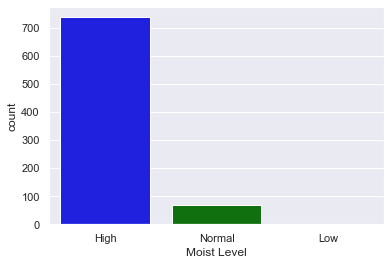

In [6]:
# Visualize the value counts of Moist Level using Seaborn library  

sns.set_theme(style="darkgrid")
palette_colors ={"Low":"red", "Normal":"green", "High":"blue"}
sns.countplot(x='Moist Level', data=df_automatic, palette=palette_colors)
plt.show()

In [7]:
# Inform the information of the total value of the variable associated with Moist Level Attribute 

df_automatic['Moist Level'].value_counts()

High      737
Normal     67
Low         1
Name: Moist Level, dtype: int64

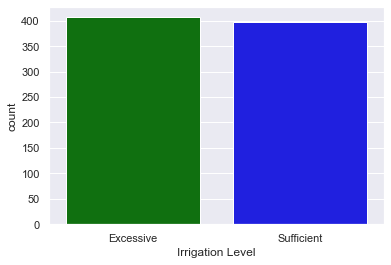

In [8]:
# Visualize the value counts of Irrigation Level using Seaborn library  

sns.set_theme(style="darkgrid")
palette_colors ={"Excessive":"green", "Sufficient":"blue"}
sns.countplot(x='Irrigation Level', data=df_automatic, palette=palette_colors)
plt.show()

In [9]:
# Inform the information of the total value of the variable associated with Irrigation Level Attribute 

df_automatic['Irrigation Level'].value_counts()

Excessive     407
Sufficient    398
Name: Irrigation Level, dtype: int64

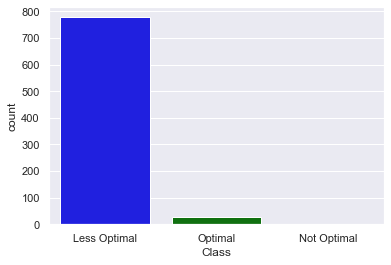

In [10]:
# Visualize the value counts of Class using Seaborn library  

sns.set_theme(style="darkgrid")
palette_colors ={"Not Optimal":"Red", "Optimal":"green", "Less Optimal":"blue"}
sns.countplot(x='Class', data=df_automatic, palette=palette_colors)
plt.show()

In [11]:
# Inform the information of the total value of the variable associated with Class Attribute 

df_automatic['Class'].value_counts()

Less Optimal    778
Optimal          26
Not Optimal       1
Name: Class, dtype: int64

### Manual Irrigation System Dataset

In [12]:
# Display the value and its corresponding attribute of the manual irrigation system dataset content in tabular form

df_manual

,Name,Moist Level,Temperature,Humidity,Light Intensity,Height,Irrigation Level,Class
Time,,,,,,,,
2021-01-04 08:00:00.000001,Pakcoy 3,High,23.70,77.50,576.67,0.00,Excessive,Less Optimal
2021-01-04 08:10:00.000000,Pakcoy 3,High,24.80,72.70,565.00,0.00,Excessive,Less Optimal
2021-01-04 08:20:00.000000,Pakcoy 3,High,24.30,73.00,820.83,0.00,Excessive,Less Optimal
2021-01-04 08:29:59.999999,Pakcoy 3,High,25.00,72.50,919.17,0.00,Excessive,Less Optimal
2021-01-04 08:40:00.000000,Pakcoy 3,High,28.40,65.10,1396.25,0.00,Excessive,Less Optimal
...,...,...,...,...,...,...,...,...
2021-01-14 14:09:40.000001,Pakcoy 4,High,31.20,60.50,995.83,1.70,Sufficient,Less Optimal
2021-01-15 09:09:30.000000,Pakcoy 4,High,23.20,83.30,341.25,2.00,Sufficient,Less Optimal
2021-01-15 09:19:31.000000,Pakcoy 4,High,23.60,82.50,436.67,2.00,Sufficient,Less Optimal


In [13]:
# Inform the information of the total of available value and the type of each attribute 

df_manual.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 789 entries, 2021-01-04 08:00:00.000001 to 2021-01-15 09:39:33
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              789 non-null    object 
 1   Moist Level       789 non-null    object 
 2   Temperature       789 non-null    float64
 3   Humidity          789 non-null    float64
 4   Light Intensity   789 non-null    float64
 5   Height            789 non-null    float64
 6   Irrigation Level  789 non-null    object 
 7   Class             789 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.1+ KB


In [14]:
# Inform the information of the related parameter of continuous variable in the dataset

pd.set_option("display.float_format", "{:.2f}".format)
df_manual.describe()

,Temperature,Humidity,Light Intensity,Height
count,789.00,789.00,789.00,789.00
mean,33.75,55.10,1819.18,1.22
std,4.89,12.64,1120.28,0.78
min,23.20,30.40,143.75,0.00
25%,30.30,45.50,1012.92,0.60
50%,33.80,53.30,1543.75,1.20
75%,37.10,64.00,2267.50,1.70
max,46.70,85.50,6096.67,2.90


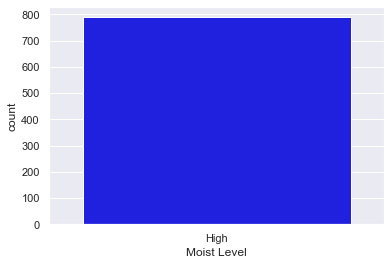

In [15]:
# Visualize the value counts of Moist Level using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors = {"Low":"red", "Normal":"green", "High":"blue"}
sns.countplot(x='Moist Level', data=df_manual, palette=palette_colors)
plt.show()

In [16]:
# Inform the information of the total value of the variable associated with Moist Level Attribute 

df_manual['Moist Level'].value_counts()

High    789
Name: Moist Level, dtype: int64

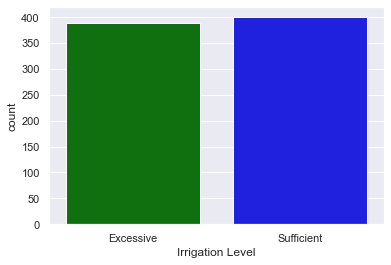

In [17]:
# Visualize the value counts of Irrigation Level using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors ={"Excessive":"green", "Sufficient":"blue"}
sns.countplot(x='Irrigation Level', data=df_manual, palette=palette_colors)
plt.show()

In [18]:
# Inform the information of the total value of the variable associated with Irrigation Level Attribute 

df_manual['Irrigation Level'].value_counts()

Sufficient    400
Excessive     389
Name: Irrigation Level, dtype: int64

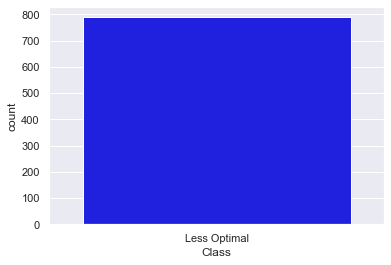

In [19]:
# Visualize the value counts of Class using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors ={"Not Optimal":"Red", "Optimal":"green", "Less Optimal":"blue"}
sns.countplot(x='Class', data=df_manual, palette=palette_colors)
plt.show()

In [20]:
# Inform the information of the total value of the variable associated with Class Attribute 

df_manual['Class'].value_counts()

Less Optimal    789
Name: Class, dtype: int64

### Analysis of the two dataset based on the irrigation system

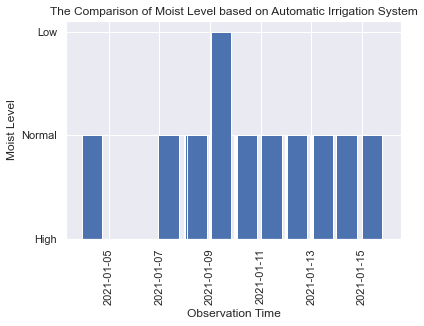

In [21]:
# Visualize the comparison of moist level of the manual dataset over time with plot 

fig, ax = plt.subplots()
ax.bar(df_automatic.index, df_automatic['Moist Level'], color='b')
ax.set_title('The Comparison of Moist Level based on Automatic Irrigation System')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Moist Level')
plt.xticks(rotation=90)
plt.show()

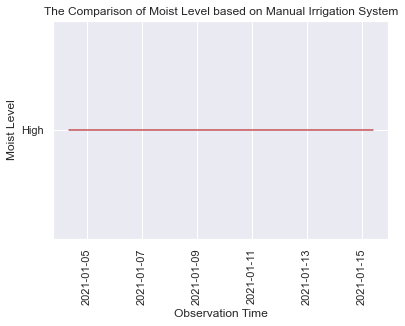

In [22]:
# Visualize the comparison of moist level of the automatic dataset over time with plot
# Bar plot is not seen 

fig, ax = plt.subplots()
ax.plot(df_manual.index, df_manual['Moist Level'], color='r')
ax.set_title('The Comparison of Moist Level based on Manual Irrigation System')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Moist Level')
plt.xticks(rotation=90)
plt.show()

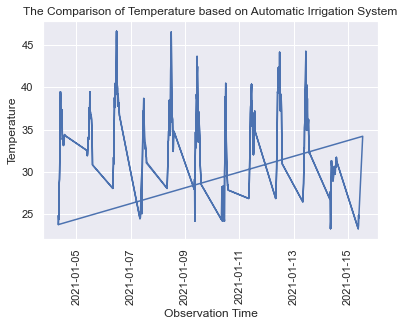

In [23]:
# Visualize the comparison of temperatur of the automatic dataset over time with plot 

fig, ax = plt.subplots()
ax.plot(df_automatic.index, df_automatic['Temperature'], color='b')
ax.set_title('The Comparison of Temperature based on Automatic Irrigation System')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

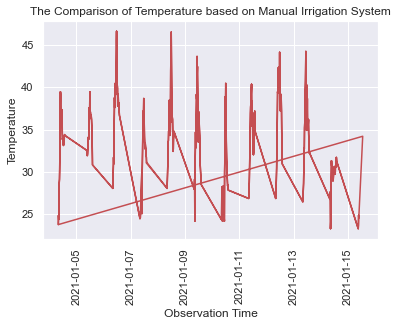

In [24]:
# Visualize the comparison of temperatur of the manual dataset over time with plot 

fig, ax = plt.subplots()
ax.plot(df_automatic.index, df_automatic['Temperature'], color='r')
ax.set_title('The Comparison of Temperature based on Manual Irrigation System')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

## Concatenate Data Frame as the Final Dataset

In [25]:
# Perform concating of the dataframe from automatic and manual irrigation system as final dataset
df_full = pd.concat([df_automatic, df_manual])

# Inform the information of the total of available value and the type of each attribute of concating data frame 
df_full

,Name,Moist Level,Temperature,Humidity,Light Intensity,Height,Irrigation Level,Class
Time,,,,,,,,
2021-01-04 08:00:00.000001,Pakcoy 1,High,23.70,77.50,576.67,0.00,Excessive,Less Optimal
2021-01-04 08:10:00.000000,Pakcoy 1,High,24.80,72.70,565.00,0.00,Excessive,Less Optimal
2021-01-04 08:20:00.000000,Pakcoy 1,High,24.30,73.00,820.83,0.00,Excessive,Less Optimal
2021-01-04 08:29:59.999999,Pakcoy 1,High,25.00,72.50,919.17,0.00,Excessive,Less Optimal
2021-01-04 08:40:00.000000,Pakcoy 1,High,28.40,65.10,1396.25,0.00,Excessive,Less Optimal
...,...,...,...,...,...,...,...,...
2021-01-14 14:09:40.000001,Pakcoy 4,High,31.20,60.50,995.83,1.70,Sufficient,Less Optimal
2021-01-15 09:09:30.000000,Pakcoy 4,High,23.20,83.30,341.25,2.00,Sufficient,Less Optimal
2021-01-15 09:19:31.000000,Pakcoy 4,High,23.60,82.50,436.67,2.00,Sufficient,Less Optimal


In [26]:
# Inform the information of the total of available value and the type of each attribute
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1594 entries, 2021-01-04 08:00:00.000001 to 2021-01-15 09:39:33
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1594 non-null   object 
 1   Moist Level       1594 non-null   object 
 2   Temperature       1594 non-null   float64
 3   Humidity          1594 non-null   float64
 4   Light Intensity   1594 non-null   float64
 5   Height            1594 non-null   float64
 6   Irrigation Level  1594 non-null   object 
 7   Class             1594 non-null   object 
dtypes: float64(4), object(4)
memory usage: 87.2+ KB


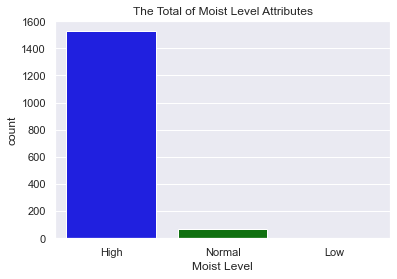

In [27]:
# Visualize the value counts of Moist Level using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors = {"Low":"red", "Normal":"green", "High":"blue"}
sns.countplot(x='Moist Level', data=df_full, palette=palette_colors).set_title('The Total of Moist Level Attributes')
plt.show()

In [28]:
# Inform the information of the total value of the variable associated with Moist Level Attribute 

df_full['Moist Level'].value_counts()

High      1526
Normal      67
Low          1
Name: Moist Level, dtype: int64

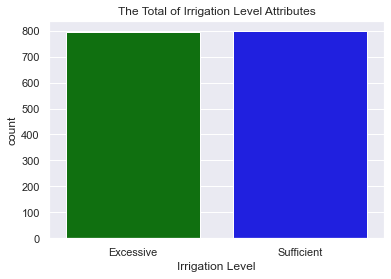

In [29]:
# Visualize the value counts of Irrigation Level using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors ={"Excessive":"green", "Sufficient":"blue"}
sns.countplot(x='Irrigation Level', data=df_full, palette=palette_colors).set_title('The Total of Irrigation Level Attributes')
plt.show()

In [30]:
# Inform the information of the total value of the variable associated with Water Intensity Attribute 

df_full['Irrigation Level'].value_counts()

Sufficient    798
Excessive     796
Name: Irrigation Level, dtype: int64

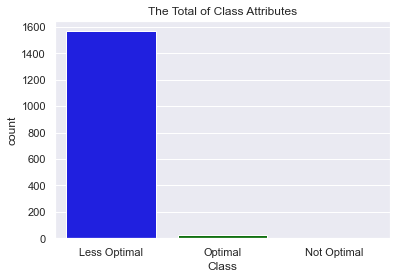

In [31]:
# Visualize the value counts of Class using Seaborn library 

sns.set_theme(style="darkgrid")
palette_colors ={"Not Optimal":"Red", "Optimal":"green", "Less Optimal":"blue"}
sns.countplot(x='Class', data=df_full, palette=palette_colors).set_title('The Total of Class Attributes')
plt.show()

In [32]:
# Inform the information of the total value of the variable associated with Class Attribute 

df_full['Class'].value_counts()

Less Optimal    1567
Optimal           26
Not Optimal        1
Name: Class, dtype: int64

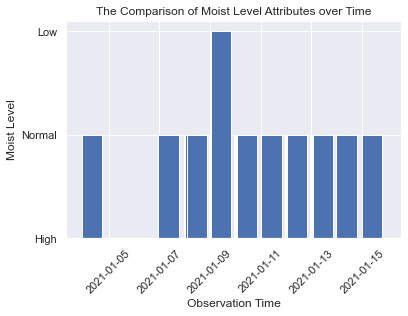

In [33]:
# Visualize the comparison of moist level of the dataset over time with bar plot 

fig, ax = plt.subplots()
ax.bar(df_full.index, df_full['Moist Level'], color='b')
ax.set_title('The Comparison of Moist Level Attributes over Time')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Moist Level')
plt.xticks(rotation=45)
plt.show()

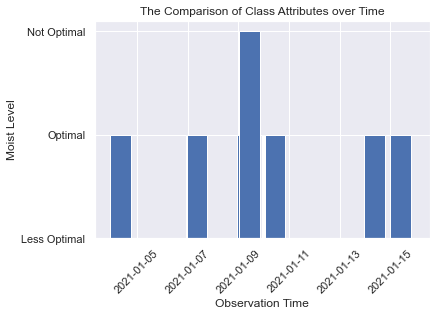

In [34]:
# Visualize the comparison of class of the dataset over time with bar plot 

fig, ax = plt.subplots()
ax.bar(df_full.index, df_full['Class'], color='b')
ax.set_title('The Comparison of Class Attributes over Time')
ax.set_xlabel('Observation Time')
ax.set_ylabel('Moist Level')
plt.xticks(rotation=45)
plt.show()

[Text(0, 0.5, 'Celcius')]

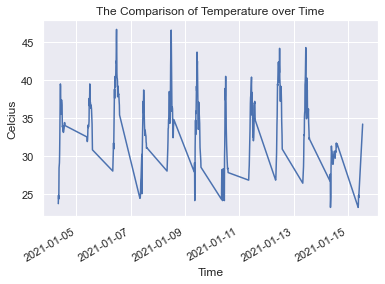

In [35]:
# Visualize the comparison of temperature over time of the dataset with plot 

df_full['Temperature'].plot(title='The Comparison of Temperature over Time').set(ylabel='Celcius')

[Text(0, 0.5, '%')]

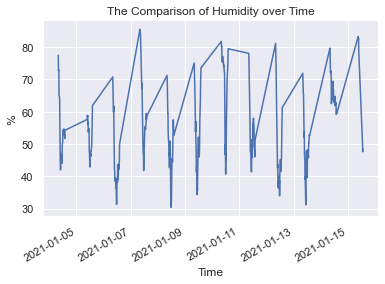

In [36]:
# Visualize the comparison of humidity over time of the dataset with plot 

df_full['Humidity'].plot(title='The Comparison of Humidity over Time').set(ylabel="%")

[Text(0, 0.5, 'Lux')]

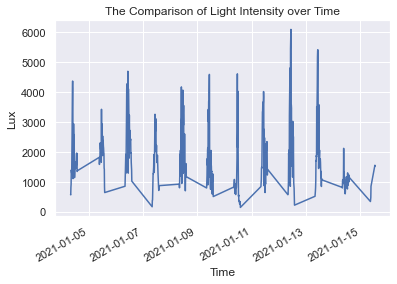

In [37]:
# Visualize the comparison of light intensity over time of the dataset with plot 

df_full['Light Intensity'].plot(title='The Comparison of Light Intensity over Time').set(ylabel="Lux")

[Text(0, 0.5, 'Height')]

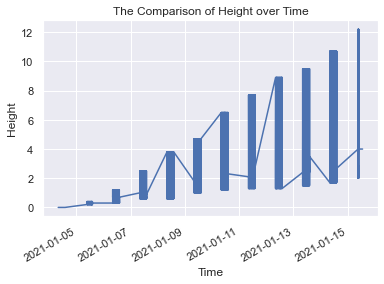

In [38]:
# Visualize the comparison of height over time of the dataset with plot 

df_full['Height'].plot(kind='line', title='The Comparison of Height over Time').set(ylabel="Height")

In [39]:
# Inform the information of related parameter for continuous variable measurement

pd.set_option("display.float_format", "{:.2f}".format)
df_full.describe()

,Temperature,Humidity,Light Intensity,Height
count,1594.00,1594.00,1594.00,1594.00
mean,33.77,55.00,1824.37,2.42
std,4.87,12.60,1115.42,2.62
min,23.20,30.40,143.75,0.00
25%,30.30,45.50,1015.73,0.70
50%,33.90,53.00,1553.75,1.40
75%,37.10,64.00,2267.50,2.80
max,46.70,85.50,6096.67,12.20


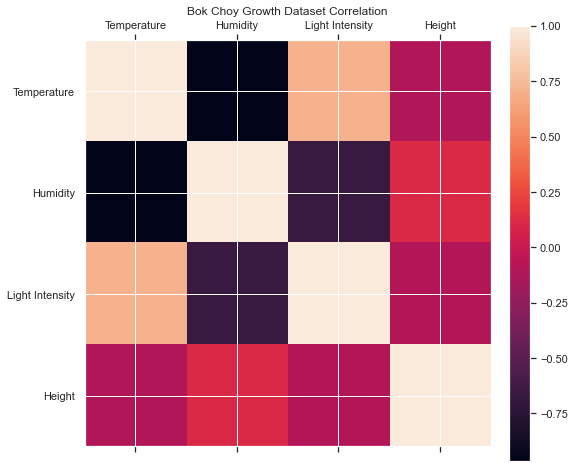

In [40]:
# Inform the information of the related parameter of continuous variable in the dataset
def plotting_corr(df_full):
    corr = df_full.corr()
    fig, ax = plt.subplots(figsize = (8,8));
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.05, pad=0.04);
    plt.title('Bok Choy Growth Dataset Correlation');
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

# Visualize the correlation matrix plot
plotting_corr(df_full)

## Model Training

### Data Preprocessing - Normalize the Attribute Value of Final Dataset

In [41]:
# Import a mandatory library to perform preprocessing stage
from sklearn import preprocessing

# Converting the categorical attribute of Moist Level to binary variable
moist_label_encoder = preprocessing.LabelEncoder()
moist_label_encoder.fit(['Low', 'Normal', 'High'])
new_moist_level = moist_label_encoder.transform(df_full['Moist Level'])

# Converting the categorical attribute of Water Intensity to binary variable
irrigation_level_encoder = preprocessing.LabelEncoder()
irrigation_level_encoder.fit(['Excessive', 'Sufficient'])
new_irrigation_level = irrigation_level_encoder.transform(df_full['Irrigation Level'])

# Replace the converted binary value to the dataset
df_full['Moist Level'] = new_moist_level
df_full['Irrigation Level'] = new_irrigation_level

In [42]:
# Inform the information of the new value of the dataset

df_full

,Name,Moist Level,Temperature,Humidity,Light Intensity,Height,Irrigation Level,Class
Time,,,,,,,,
2021-01-04 08:00:00.000001,Pakcoy 1,0,23.70,77.50,576.67,0.00,0,Less Optimal
2021-01-04 08:10:00.000000,Pakcoy 1,0,24.80,72.70,565.00,0.00,0,Less Optimal
2021-01-04 08:20:00.000000,Pakcoy 1,0,24.30,73.00,820.83,0.00,0,Less Optimal
2021-01-04 08:29:59.999999,Pakcoy 1,0,25.00,72.50,919.17,0.00,0,Less Optimal
2021-01-04 08:40:00.000000,Pakcoy 1,0,28.40,65.10,1396.25,0.00,0,Less Optimal
...,...,...,...,...,...,...,...,...
2021-01-14 14:09:40.000001,Pakcoy 4,0,31.20,60.50,995.83,1.70,1,Less Optimal
2021-01-15 09:09:30.000000,Pakcoy 4,0,23.20,83.30,341.25,2.00,1,Less Optimal
2021-01-15 09:19:31.000000,Pakcoy 4,0,23.60,82.50,436.67,2.00,1,Less Optimal


### Scaling the Final Dataset

In [43]:
# Seperating the attributes for training and class for test set
attributes_name =['Moist Level', 'Temperature', 'Humidity', 'Light Intensity', 'Height', 'Irrigation Level']
label = ['Class']

# Define the variable for train/test method 
X = df_full[attributes_name]
y = df_full[label]

<AxesSubplot:title={'center':'Pearson Correlation of Attributes'}>

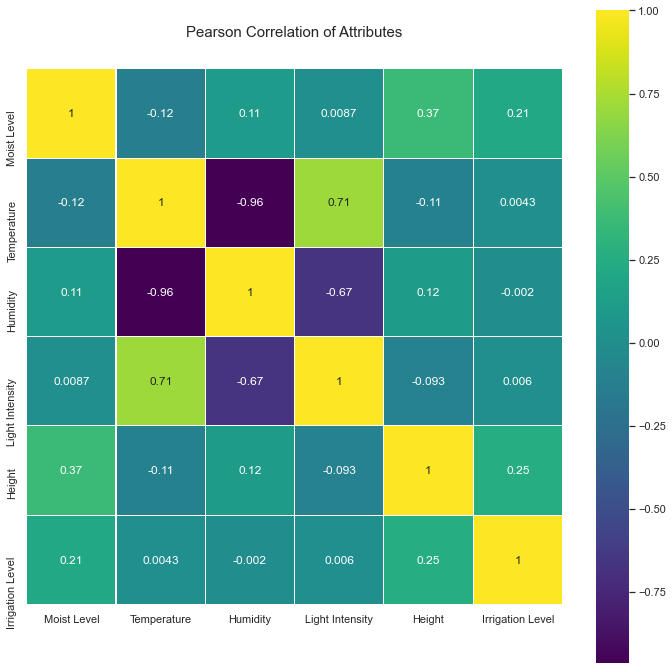

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Attributes', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Split the Final Dataset

In [45]:
# Import a mandatory library to perform training/test split method
from sklearn.model_selection import train_test_split

# Perfotm train and test split data corresponds to the attribute and label with train test split function  
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train

,Moist Level,Temperature,Humidity,Light Intensity,Height,Irrigation Level
Time,,,,,,
2021-01-13 13:19:53.000000,0,34.50,49.50,1136.67,1.50,1
2021-01-12 13:20:41.000000,0,37.10,45.60,960.83,1.30,1
2021-01-13 10:59:50.000000,0,40.10,39.40,2412.08,9.50,1
2021-01-05 12:41:56.999999,0,36.40,46.20,2081.67,0.40,1
2021-01-08 11:59:48.999999,0,44.00,32.30,3553.75,0.60,1
...,...,...,...,...,...,...
2021-01-13 10:49:49.000001,0,44.30,31.20,5170.42,2.40,0
2021-01-06 13:50:20.000000,0,37.10,44.40,1530.00,0.30,1
2021-01-06 08:30:10.000000,0,29.80,63.70,1576.67,0.70,0


In [46]:
# Inform the shape of the attribute train data in two dimensioanal array corresponds to row and column

print(X_train.shape)

(1275, 6)


In [47]:
# Inform the shape of the attribute test data in two dimensioanal array corresponds to row and column

print(X_test.shape)

(319, 6)


In [48]:
# Inform the shape of the label train data in two dimensioanal array corresponds to row and column

print(y_train.shape)

(1275, 1)


In [49]:
# Inform the shape of the train test data in two dimensioanal array corresponds to row and column

print(y_test.shape)

(319, 1)


### Training Process

In [50]:
# Import a mandatory library to perform training set
from sklearn.tree import DecisionTreeClassifier

# Conduct the machine learning by decision tree by using decision tree classifer function from tree package
classification_tree = DecisionTreeClassifier(criterion="gini",
                                             splitter="best",
                                             max_depth=3,
                                             min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0,
                                             max_features=None,
                                             random_state=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             class_weight=None,
                                             ccp_alpha=0.0)

# Perform the fitting to the training data of attribute and label for machine learning  
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(111.60000000000001, 190.26, 'X[0] <= 0.5\ngini = 0.032\nsamples = 1275\nvalue = [1254, 1, 20]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 1219\nvalue = [1219, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 26.3\ngini = 0.482\nsamples = 56\nvalue = [35, 1, 20]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 20\nvalue = [0, 0, 20]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 1.5\ngini = 0.054\nsamples = 36\nvalue = [35, 1, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]')]

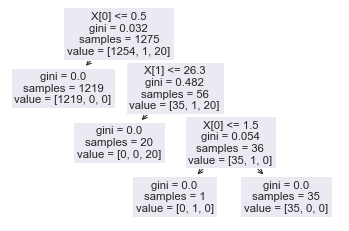

In [51]:
# Import a mandatory library to perform tree structure
from sklearn import tree

# Visualize the tree structure by tree plot function from tree package
tree.plot_tree(classification_tree)

In [52]:
print(tree.export_text(classification_tree))

|--- feature_0 <= 0.50
|   |--- class: Less Optimal
|--- feature_0 >  0.50
|   |--- feature_1 <= 26.30
|   |   |--- class: Optimal
|   |--- feature_1 >  26.30
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: Not Optimal
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: Less Optimal



## Perform Classifier's prediction by using test data 

In [53]:
# The classifer operation
y_predict = classification_tree.predict(X_test)

# Inform the classifier's result for each instances in the dataset
y_predict

array(['Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Less Optimal', 'Less Optimal', 'Less Optimal', 'Less Optimal',
       'Les

## Model Metrics Report

In [54]:
# Import a mandatory library to perform model metrics report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inform the result of the accuracy score result
acr_scr = accuracy_score(y_test, y_predict)
print(f"Accuracy Score: {acr_scr * 100:.2f}%")

Accuracy Score: 100.00%


In [55]:
# Inform the result of confusion matrix 
cfx_mat = confusion_matrix(y_test, y_predict)
print(f"Confusion Matrix:\n{cfx_mat}")

Confusion Matrix:
[[313   0]
 [  0   6]]


In [56]:
# Inform the result of classification report 
cls_rpt = classification_report(y_test,y_predict)
print(f"Classification Report:\n{cls_rpt}")

Classification Report:
              precision    recall  f1-score   support

Less Optimal       1.00      1.00      1.00       313
     Optimal       1.00      1.00      1.00         6

    accuracy                           1.00       319
   macro avg       1.00      1.00      1.00       319
weighted avg       1.00      1.00      1.00       319



## Save Model

In [57]:
# Import the fundamental library to save the prediction model

import pickle 
model_filename = 'Final Result/trained_tree_classifier.pkl'
encoder_moist_level_filename = 'Final Result/encoder_moist_level.pkl'
encoder_irrigation_level_filename = 'Final Result/encoder_irrigation_level.pkl'

In [58]:
# The content of the Model File
with open(model_filename, 'wb') as handle:
    pickle.dump(classification_tree, handle)
    
# The content of the Moist Level Encoder File
with open(encoder_moist_level_filename, 'wb') as handle:
    pickle.dump(moist_label_encoder, handle)
    
# The content of the Moist Level Encoder File
with open(encoder_irrigation_level_filename, 'wb') as handle:
    pickle.dump(irrigation_level_encoder, handle)    